Data Preprocessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('datasets_house_prices.csv')

In [3]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [4]:
print(df.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Model Implementation

In [14]:
theta = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

Model Training

In [9]:
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]


In [10]:
X_train = pd.concat([pd.DataFrame({'bias': [1] * X_train.shape[0]}), X_train], axis=1)
X_test = pd.concat([pd.DataFrame({'bias': [1] * X_test.shape[0]}), X_test], axis=1)

In [15]:
train_predictions = X_train @ theta

In [16]:
mse = np.mean((y_train - train_predictions) ** 2)

Model Evaluation

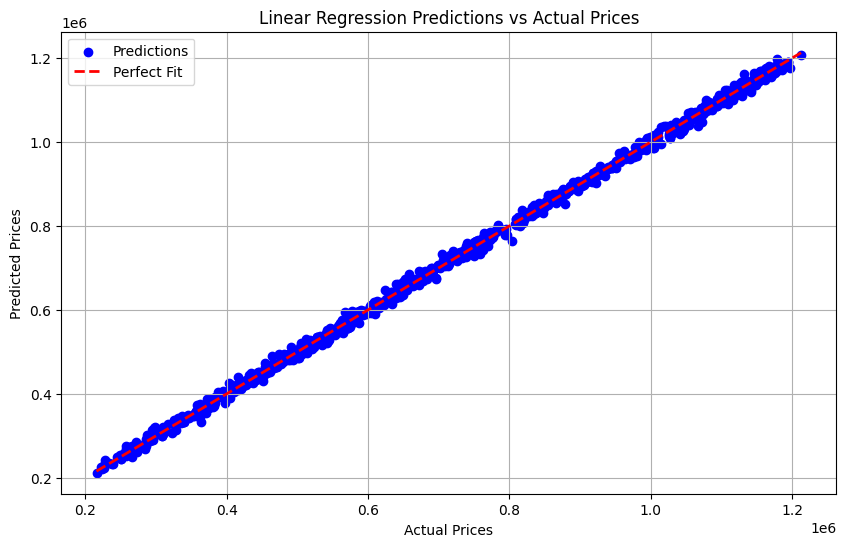

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Predictions vs Actual Prices')
plt.legend()
plt.grid()
plt.show()

In [18]:
print("Coefficients:", theta)
print("Mean Squared Error (MSE) on training data:", mse)

Coefficients: [-1603.40634771   300.43821262  4988.51395853  -198.94062251
  -972.92588794]
Mean Squared Error (MSE) on training data: 98838760.11918011
